<a href="https://colab.research.google.com/github/qfx4yk/ds1002-qfx4yk/blob/main/in-class%20exercises/22-data-cleaning-in-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Normalized Data

Having cleaned, ordered, organized data makes your next steps easy. Take the `airquality` sample data set for example:

In [ ]:
airquality

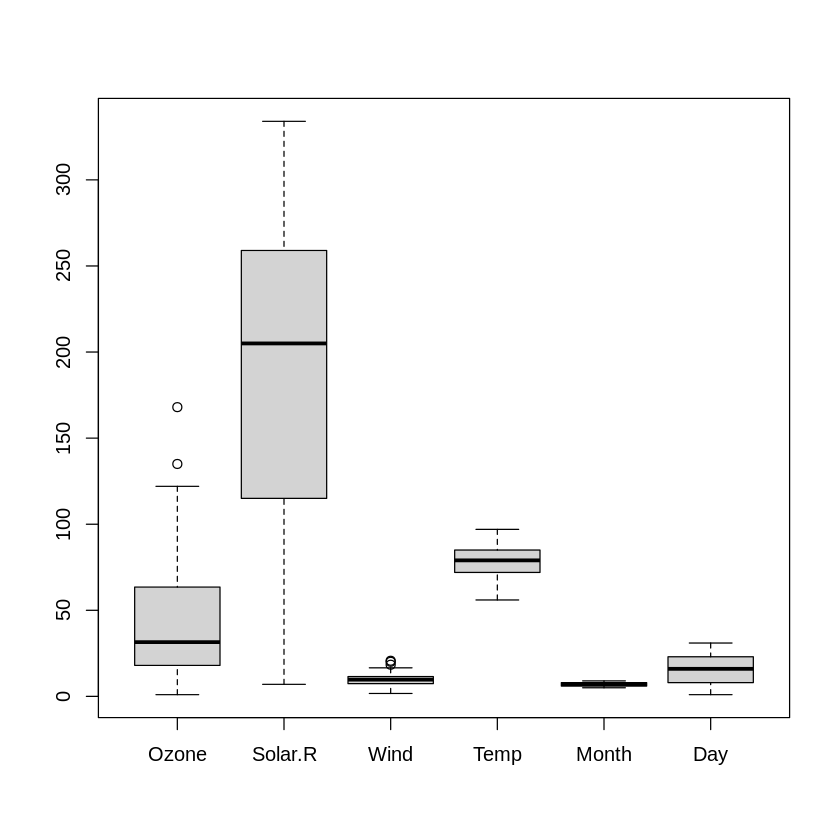

In [ ]:
boxplot(airquality)

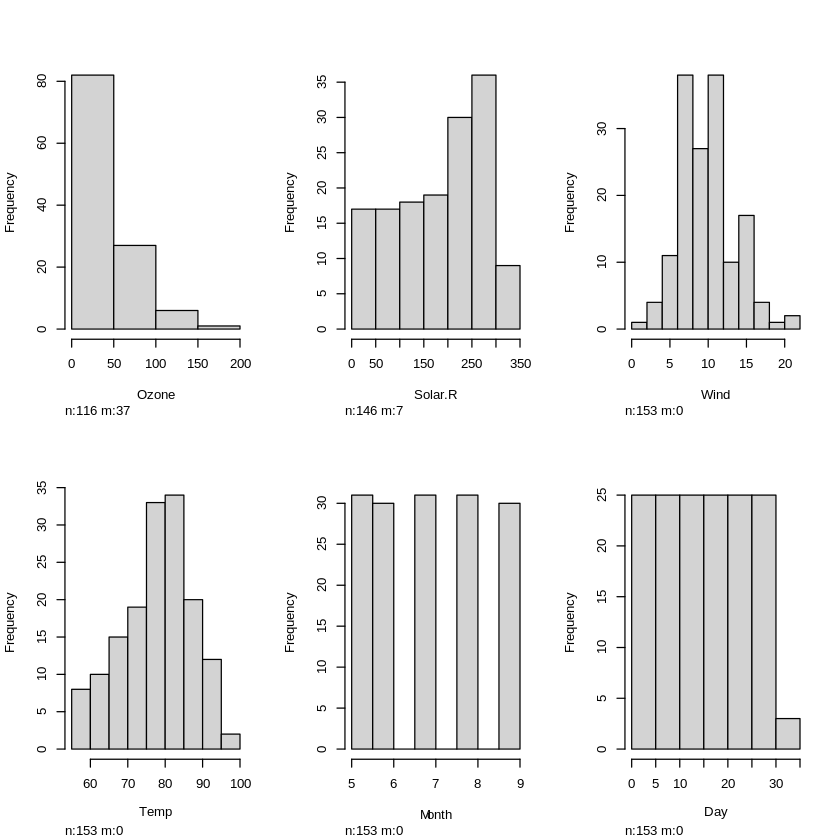

In [ ]:
hist(airquality)

## Data Cleaning

Normal cleaning and management operations are just as common in R as they are in Python. The most frequent cleaning tasks are:

- Identifying and removing duplicate rows.
- Normalizing data values.
- Finding empty / NULL / `NA` values and determining what to do with them, i.e. deleting, imputing, etc.


In [ ]:
df <- read.csv("https://raw.githubusercontent.com/nmagee/ds1002/main/data/very-messy-data-2.csv")

In [ ]:
# Use str() to get the structure of the data frame:

str(df)

'data.frame':	1316 obs. of  6 variables:
 $ id          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ sepal_length: num  3.5 3.6 3.8 5.8 4.9 5 4.8 5.5 5.5 NA ...
 $ sepal_width : num  2.9 3.2 NA 2.7 3.6 2.7 3 2.2 2.9 3.4 ...
 $ petal_length: num  1.4 3 2.2 2.6 3 1.4 2.6 2.1 1.1 2.6 ...
 $ petal_width : chr  "0.5" "0.5" "1.5" "1.2" ...
 $ species     : chr  "virginica" "setosa" "setosa" "virginica" ...


In [ ]:
# Use summary() to get summary data for each attribute, including empty values.

summary(df)

       id          sepal_length   sepal_width     petal_length  
 Min.   :   1.0   Min.   :3.00   Min.   :2.000   Min.   :1.000  
 1st Qu.: 215.0   1st Qu.:3.80   1st Qu.:2.500   1st Qu.:1.500  
 Median : 379.5   Median :4.60   Median :3.000   Median :2.000  
 Mean   : 442.4   Mean   :4.53   Mean   :2.993   Mean   :2.005  
 3rd Qu.: 671.2   3rd Qu.:5.20   3rd Qu.:3.500   3rd Qu.:2.500  
 Max.   :1000.0   Max.   :6.00   Max.   :4.000   Max.   :3.000  
                  NA's   :72     NA's   :213     NA's   :127    
 petal_width          species         
 Length:1316        Length:1316       
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      
                                      

In [ ]:
df

### Duplicate Rows

To see how many duplicate rows exist in a data frame:

In [ ]:
nrow(df[duplicated(df), ])

[1] 316

To remove duplicate rows from a data frame there is a simple one-line command. This will select all NON-duplicated rows from the `df` data frame and pass them into a new data frame named `df2`:

In [ ]:
df2 <- df[!duplicated(df), ]

In [ ]:
# or, using dplyr, pass the

library(dplyr)
df2 <- df %>% distinct()

### Look for Irregularities

Sometimes a row value will be out of the bounds of expected data values. A good example of this might be a `logical` column where you expect to see `TRUE` and `FALSE`. It's useful to look at a list of the distinct values from a column. Use the `unique()` function to return these.

In [ ]:
unique(df2$sepal_length)
unique(df2$sepal_width)
unique(df2$petal_length)
unique(df2$petal_width)
unique(df2$species)

[1] 3.5 3.6 3.8 5.8 4.9 5.0 4.8 5.5  NA 3.7 4.7 6.0 3.3 4.1 4.6 3.1 4.4 5.7 5.6
[20] 3.2 3.9 5.9 4.0 5.4 5.3 5.2 3.0 4.3 5.1 4.2 3.4 4.5

[1] 2.9 3.2  NA 2.7 3.6 3.0 2.2 3.4 2.1 3.5 2.0 2.6 2.5 2.4 3.3 3.7 3.1 2.8 3.8
[20] 4.0 3.9 2.3

[1] 1.4 3.0 2.2 2.6 2.1 1.1 1.6 1.2 2.9 1.9 1.3 1.8 2.8 2.5 2.0 2.4 2.7 1.5 2.3
[20]  NA 1.7 1.0

[1] "0.5"  "1.5"  "1.2"  "2.3"  "1.4"  "2.1"  "3"    "1.9"  "1.3"  "gg28"
[11] "2.6"  "0.4"  "0.7"  "0.9"  "1.8"  ""     "gg29" "0.3"  "2.2"  "0.1" 
[21] "2.7"  "2.9"  "1"    "1.6"  "2.4"  "2"    "0.6"  "0.8"  "2.8"  "1.1" 
[31] "0.2"  "1.7"  "0"    "2.5"

[1] "virginica" "setosa"    ""

### Update Values As Needed

To remove or `NA` a specific value within an observation, simply map a new value to a `df` search.

Suppose you want to remove "empty" values and replace them with `NA`, use this syntax:

```
df2[df2==""] <- NA
```

In [ ]:
df2[df2=="gg28"] <- NA
df2[df2=="gg29"] <- NA
df2[df2==""] <- NA
head(df2)

,id,sepal_length,sepal_width,petal_length,petal_width,species
,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,3.5,2.9,1.4,0.5,virginica
2,2,3.6,3.2,3.0,0.5,setosa
3,3,3.8,NA,2.2,1.5,setosa
4,4,5.8,2.7,2.6,1.2,virginica
5,5,4.9,3.6,3.0,1.2,virginica
6,6,5.0,2.7,1.4,2.3,setosa


### Update Data Type of a Column

Notice the `petal_width` column is seen as a `chr` data type. We should update that.

In [ ]:
# cast the column values as.numeric. Push into a var

petal_width_numeric <- as.numeric(df2$petal_width)

In [ ]:
# double check the type of the new object

typeof(petal_width_numeric)

[1] "double"

In [ ]:
# view the values in the new object

petal_width_numeric

[1] 0.5 0.5 1.5 1.2 1.2 2.3 1.4 2.1 3.0 1.9 1.3  NA 1.9 2.6 0.4 0.7 2.6 0.9
  [19] 1.8  NA 0.7 1.9  NA 0.3 0.7 2.2 0.1 1.2 2.3 2.7 2.6  NA 0.1 1.3 2.9  NA
  [37] 2.2 1.0 1.6 0.7 1.9 2.4 2.0 1.9 2.9 2.0 0.6 2.9 2.2 0.8 0.3 3.0 2.7 2.2
  [55] 2.4 2.8 0.9 2.2 1.1 0.2  NA 2.4  NA 1.7 2.1 0.6 1.9  NA 0.1 0.7 1.6 2.2
  [73]  NA 2.8 0.0 1.6 0.9 1.5 2.3 2.9 2.8 2.5 2.6 1.5 1.4 2.7 2.9 2.6  NA 0.3
  [91] 1.6 1.9 0.5 0.2 2.3 2.5 0.5 0.7 0.1 1.5 2.6 0.1 3.0 0.7 2.0 2.6 1.2 2.1
 [109] 0.2 0.0 0.8 1.7 0.3 2.7 1.1 0.3 2.4  NA  NA 2.8 2.8  NA 1.3 1.5 0.7 0.9
 [127] 2.1  NA 0.3 2.7 2.3 2.2 0.0 2.3 2.8 0.4 0.8 0.1  NA 0.9 2.9 1.4 0.6 0.2
 [145] 0.4 2.8  NA 1.7 0.8 1.4 2.3 1.5 0.4 1.1 0.3 0.8 2.8 0.0 2.8 2.3 2.8 1.5
 [163] 0.2  NA 0.8 2.9 1.5 1.8 2.7 0.5 1.6 0.5 0.8  NA 0.5  NA 1.3 2.4 1.5 1.0
 [181] 1.3 1.5 2.4 2.5 0.3 0.2 0.7 2.2 1.3 2.8 1.1 1.4 0.7 2.5 2.4 1.5  NA 1.9
 [199] 2.1 1.5 1.9 0.3 2.0 1.2 0.5 1.7 2.4 1.8 2.3  NA  NA 2.6 2.8 2.8 1.2 1.2
 [217] 1.7 0.9 0.5 1.5 3.0 0.4 0.0 1.1 1.7 2.1 2.4 2.6 2.4 2.2 1.8 0.7 1.0 2.2
 [235] 1.7 2.0 2.8 2.4 2.9  NA 0.2 0.1 0.6 2.7  NA 2.8 0.5 0.3 1.9 2.5 0.1 2.4
 [253] 2.7 1.9 0.9 1.4  NA 2.0 2.9 0.6 0.5 2.6 1.1 2.9  NA 0.0 3.0 2.1  NA 2.5
 [271] 0.1 1.8 2.6 0.6 2.5 0.6 1.2 2.2 1.1 2.4  NA  NA 0.9 0.2 2.5 1.9 1.1  NA
 [289] 2.7 3.0 1.0 1.6 2.3 0.5 2.5 1.7 2.9 0.1 1.4 2.6 0.3 2.0 0.0 1.1 2.6 1.4
 [307] 1.8  NA 2.4 2.8 2.8 1.0 0.1 0.7 0.4  NA 1.9 0.9 2.7 2.4 2.3 2.6 2.4 0.4
 [325] 2.0 1.4 2.3 1.3 1.6 1.6 1.8 2.4 1.0 0.8 1.4 2.0 0.2 0.5 0.8 2.0 1.7  NA
 [343] 0.1 1.9 1.4  NA  NA  NA 1.1 1.7 0.0 1.4 1.2 2.6 1.9 2.3 2.3 0.8 2.6 0.2
 [361] 2.5 1.4 1.0 2.4 1.4  NA  NA 1.3 2.3 3.0 1.1 2.4  NA 0.6 0.6 1.3 1.4 3.0
 [379] 2.4 2.6 0.5 2.0 2.9 1.0 0.1 0.7 1.7 1.7  NA 2.1 2.3 0.2 2.5 2.0 1.0  NA
 [397] 1.4 0.3  NA 0.9 2.3 2.6 1.6 0.6 0.4 0.8 1.9 0.7 2.5 1.7 0.9 0.5 0.1 2.8
 [415]  NA 1.0 2.4 2.6 1.6 1.3 2.5 2.1 0.4 2.2 0.7  NA 1.7 2.7 2.4 0.6 0.9 0.7
 [433] 1.7 2.9 0.1 2.2 2.1 0.6 2.9 0.1 1.2 0.6 0.9 0.5 2.8 0.3 2.4 2.0 1.3 2.0
 [451] 0.0 0.5 1.0 1.2 2.7 2.1 2.6 0.0 2.4 0.0 0.1 0.6 0.5 2.2 1.3 1.0 2.5 2.8
 [469] 2.1 2.8 0.8 1.7 1.2 2.6 2.9  NA 1.7 1.2 1.8 2.0 2.6 1.6 2.6 1.7 1.1 1.1
 [487] 1.9 2.0 2.6  NA 2.6 0.4 0.3 0.2 0.7 0.0 1.3 0.6 2.4 1.1 0.6 0.5 2.3 3.0
 [505] 0.5  NA 1.1 2.5 2.8 2.1 2.5 2.6 1.7 2.3 0.6 1.3 2.0 0.3 2.9 0.5 2.3 0.7
 [523] 1.2 2.8 1.2 0.3 0.2 1.9 1.3 2.0 2.7 1.0 1.5 1.0  NA 0.6 0.3 0.4  NA 2.7
 [541] 0.2 0.9 1.2 0.5 1.7 1.1 2.6 1.8 2.2 1.2 2.9 0.0 1.7 0.3 1.0 1.0 1.0 2.9
 [559] 2.8 2.7 0.2 2.2 1.2 2.5 1.8 2.2 0.4 0.2 2.6 2.9 0.4 2.4 0.5 2.0 2.4 2.8
 [577]  NA 2.1 1.1 2.2 1.5 1.5 2.5 1.2 2.9 2.7 1.0 0.5 2.1 2.0 1.6 1.1 0.5 1.3
 [595] 1.0 2.4 0.6 1.1 2.8 2.8 2.0 2.0 1.6 2.4 2.5 2.6 0.2 2.6 0.5 1.6 1.1 2.7
 [613] 0.0 2.7 2.4 2.4 0.9 2.1  NA 2.2 1.4 1.7 0.7 0.3 2.8 2.4  NA 0.4 1.6 2.1
 [631] 1.1 2.8 0.1 2.2 0.8 0.7 1.7 1.5 1.7 0.3 0.1 2.7  NA 1.0 2.8 1.5 1.3 0.2
 [649] 0.6 2.9 2.8 2.3 2.3 1.5 2.8 0.3 2.5 0.6 1.4 2.6 1.7 2.5 1.6 2.3 1.6 2.9
 [667] 0.0 0.4 0.1  NA 2.3 0.4 0.2 2.5 2.6 1.2 0.0 1.2 1.4 1.0 0.3 0.6 1.7 2.0
 [685] 1.4 0.2 0.2 1.3 2.6 1.1 3.0  NA 0.0 1.3 2.0 2.7 1.1 1.4 2.4 1.3 2.2 0.6
 [703] 1.7 0.6 1.8 1.9 1.7 0.9 2.8 2.4 1.6 3.0  NA 1.5 2.5  NA 1.7 0.3 2.1 0.7
 [721]  NA 2.2  NA 2.0 0.1 2.0 2.5  NA 1.9 0.0 2.9 2.9 2.9 1.7 0.3 2.5 0.1 0.6
 [739] 0.1 0.4 1.0 1.7 0.5 2.4 2.8 2.0 1.4 2.4 0.2 1.4 1.0 0.4 1.9 1.5 2.2 2.5
 [757] 2.0 2.9 0.8 2.7 0.6 0.7  NA 1.5 2.7 2.0 1.0 0.0 2.5 0.4 2.1 0.8 2.6 1.3
 [775] 3.0 1.2 1.7 1.2 0.2 2.0 2.8 2.4 0.9 1.8 1.8 2.1 3.0 3.0 2.0 2.7 1.5 1.8
 [793] 2.6 2.1 1.6  NA 2.2 0.7 2.8 1.3 0.9  NA 1.1 0.2 0.8 2.7 2.5 0.1 0.2 1.6
 [811] 2.3 0.9 0.2  NA 0.3 1.8 2.6 2.6 2.8 1.8 2.8 0.2 1.3 0.7 2.4 1.9 1.8 2.1
 [829] 2.6 2.3 1.3 2.8 2.8 2.5 2.4 1.8 1.8 1.0 1.1 2.4 0.8 1.5  NA 0.8 0.5 2.9
 [847] 1.4 0.5  NA 0.7 0.3 0.1 2.5 1.1 1.5 1.3 1.0 1.7 1.5 1.3 1.0 2.0 2.7  NA
 [865] 2.1 2.5 2.4 0.4  NA 2.6 1.1 0.9 1.6 0.1 1.7 1.1 0.5 1.4 0.9 0.0 0.8 0.6
 [883] 2.2 1.1 2.6 2.3 0.2 1.6 0.9 0.5 2.8 0.8 1.4 0.4 1.7 0.7 1.3 2.0 2.2 0.7
 [901] 2.3 2.5 1.7 1.9 1.0 0.5 1.8 2.8 2.7  NA 2.2 0.

In [ ]:
# push that vector into the column

df2$petal_width <- petal_width_numeric

In [ ]:
# now look at the data types in the data frame

structure(df2)

,id,sepal_length,sepal_width,petal_length,petal_width,species
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,3.5,2.9,1.4,0.5,virginica
2,2,3.6,3.2,3.0,0.5,setosa
3,3,3.8,NA,2.2,1.5,setosa
4,4,5.8,2.7,2.6,1.2,virginica
5,5,4.9,3.6,3.0,1.2,virginica
6,6,5.0,2.7,1.4,2.3,setosa
7,7,4.8,3.0,2.6,1.4,setosa
8,8,5.5,2.2,2.1,2.1,virginica
9,9,5.5,2.9,1.1,3.0,setosa


The above method is useful whenever you need to push a replacement value into specific cells.

In [ ]:
# This can be done in one simple command:

df2$petal_width <- as.numeric(df2$petal_width)

### Remove Rows with `NA` values

A simple way to do this is to extract only valid data out of the data frame with the `na.omit` method:

**This is a destructive action!**

In [ ]:
df_no_empty <- na.omit(df2)
str(df_no_empty)

In [ ]:
# Two other methods to achieve this:

#Remove rows with NA's using complete.cases
df <- df[complete.cases(df), ]

#Remove rows with NA's using rowSums()
df <- df[rowSums(is.na(df)) == 0, ]

# Or with the tidyverse library
library("tidyr")

#Remove rows with NA's using drop_na()
df <- df %>% drop_na()

### Imputate Missing Data

The question surrounding imputation is WHAT to replace `NA` values with. This question is a data/statistical one and should not be treated lightly. The answer can throw off results greatly.

Because R is a statistical language, getting statistical data values for a column, such as `mean` or `sum` is simple:

In [ ]:
nums <- c(4.14,8.26,14.84,18.6,7,11.9)

In [ ]:
mean(nums)

[1] 10.79

In [ ]:
sum(nums)

[1] 64.74

With that caveat in mind, here is the method for imputing missing values and replacing them with the mean of the rest of the data.

The R below will update the sepal and petal columns by replacing empty values with the mean of the valid values within each column.

In [ ]:
df2$sepal_length[is.na(df2$sepal_length)] <- mean(df2$sepal_length, na.rm = TRUE)
# while in the column sepal_length where it's NA, assign the MEAN value of the column while you ignore NA values.

df2$sepal_width[is.na(df2$sepal_width)] <- mean(df2$sepal_width, na.rm = T)
df2$petal_length[is.na(df2$petal_length)] <- mean(df2$petal_length, na.rm = T)
df2$petal_width[is.na(df2$petal_width)] <- mean(df2$petal_width, na.rm = T)

df2

In [ ]:
# Another way to achieve this is using the Hmisc package

df3 <- read.csv("https://raw.githubusercontent.com/nmagee/ds1002/main/data/very-messy-data.csv")
df3 <- df3[!duplicated(df3), ]

install.packages("Hmisc")
library(Hmisc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
df3$sepal_length <- impute(df3$sepal_length, median)
df3$sepal_width <- impute(df3$sepal_width, median)
df3$petal_length <- impute(df3$petal_length, median)
df3$petal_width <- impute(df3$petal_width, median)

In [ ]:
# Notice this has changed the data types of the cols:

structure(df3)

,id,sepal_length,sepal_width,petal_length,petal_width,species
,<int>,<impute>,<impute>,<impute>,<impute>,<chr>
1,1,3.5,2.9,1.4,0.5,virginica
2,2,3.6,3.2,3.0,0.5,setosa
3,3,3.8,3.0,2.2,1.5,setosa
4,4,5.8,2.7,2.6,1.2,virginica
5,5,4.9,3.6,3.0,1.2,virginica
6,6,5.0,2.7,1.4,2.3,setosa
7,7,4.8,3.0,2.6,1.4,setosa
8,8,5.5,2.2,2.1,2.1,virginica
9,9,5.5,2.9,1.1,3.0,setosa


### Remove Whitespace

Create a simple data frame with extra space characters thrown in:

In [ ]:
df_space <- data.frame(first  = c("Boston ", " Chicago ", "New York ", " Minneapolis", " Portland"),
                        second = c("Massachusetts", " Illinois", "New  York", "Minnesota", "  Oregon"),
                        third = c("New England  ", "Mid-West", " New England", "Mid-West", "North-West ")
                      )

In [ ]:
df_space$first

[1] "Boston "      " Chicago "    "New York "    " Minneapolis" " Portland"

In [ ]:
library(dplyr)
library(stringr)

df5 <- df_space %>%
  mutate(across(where(is.character), str_trim))

In [ ]:
df_space$first

[1] "Boston "      " Chicago "    "New York "    " Minneapolis" " Portland"

Note the above `dplyr` does not save the cleaned data. To do this, assign the output into the same/new parameter:

In [ ]:
df_space <- df_space %>%
  mutate(across(where(is.character), str_trim))

df_space

first,second,third
<chr>,<chr>,<chr>
Boston,Massachusetts,New England
Chicago,Illinois,Mid-West
New York,New York,New England
Minneapolis,Minnesota,Mid-West
Portland,Oregon,North-West


## Extracting Row Data back into Vector

To extract a column of attributes back into a vector, call it out by appending `$ColName` to the data frame.

In [ ]:
df2$sepal_length

# Or assign into a var
sepal_length_extracted <- df2$sepal_width